In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utils import getDf

In [3]:
df_augmentation = getDf('../../data/augmentation')
df_no_augmentation = getDf('../../data/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,1000,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,456,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


# Number of images by files

<AxesSubplot:xlabel='number_img'>

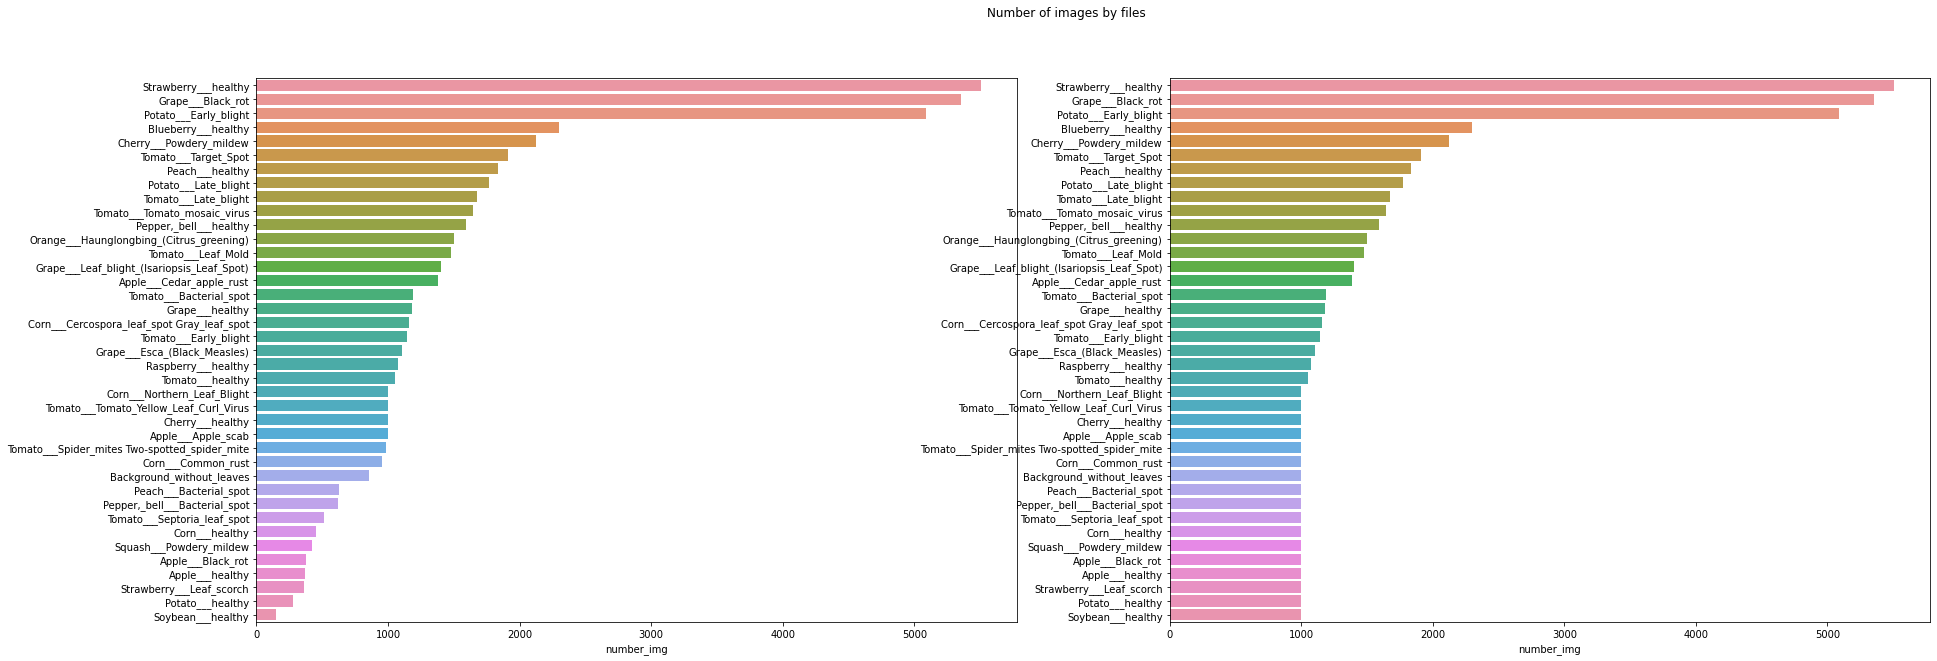

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images by files')

sns.barplot(ax=axes[0], y=df_no_augmentation.index, x='number_img', data=df_no_augmentation.sort_values(by=['number_img'], ascending=False))
sns.barplot(ax=axes[1], y=df_augmentation.index, x='number_img', data=df_augmentation.sort_values(by=['number_img'], ascending=False))

# Species and number of images

Text(0.5, 1.0, 'with augmentation')

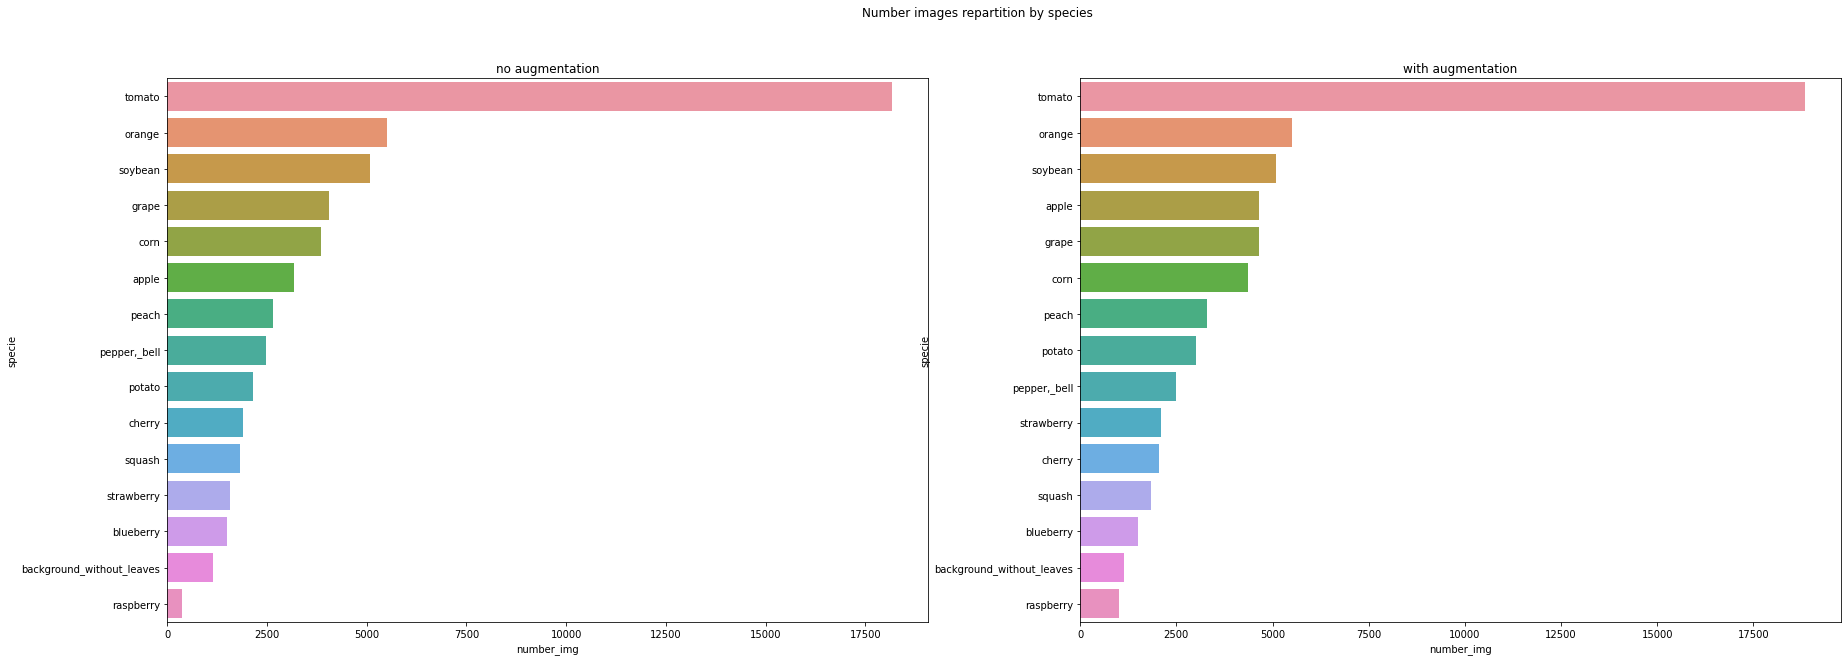

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number images repartition by species')

df_no_augmentation_groupby_specie = df_no_augmentation.groupby(by='specie').sum()
df_no_augmentation_groupby_specie.reset_index(inplace=True)

df_augmentation_groupby_specie = df_augmentation.groupby(by='specie').sum()
df_augmentation_groupby_specie.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="specie", data=df_no_augmentation_groupby_specie, order=df_no_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)
sns.barplot(ax=axes[1], x="number_img", y="specie", data=df_augmentation_groupby_specie, order=df_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

# Conclusion et pistes

### Pour les classes "imbalanced":

- Beaucoup de classes sont "imbalanced". (cf les deux premiers graphs)
- Nous devons ajouter plus d'images pour reduire la difference (max - min).

> ⚠️ Attention tout de meme au classes qui ont deja ete augmenté.


### Pour la reconnaissance de l'espece:

- Nous pouvons utiliser la forme de la feuille ainsi que la mettre en noir et blanc.
- En utilisant les dossiers avec les maladies et en bonne santé.

> ⚠️ Attention tout de meme au maladies "late" qui peuvent avoir des formes de feuilles très special.


### Pour la reconnaissance des maladies:

🤷‍♂️